In [1]:
import glob
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [2]:
#Loading Data
us_census = pd.concat([pd.read_csv(f) for f in glob.glob('./data/states*.csv')], ignore_index = True)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Rhode Island,1053661,13.356666666666678%,74.32541666666665%,5.68291666666667%,0.3462500000000001%,3.2474999999999983%,0.035833333333333335%,$59125.270833333336,510388M_543273F
1,1,South Carolina,4777576,5.056684981684991%,62.888736263736185%,28.75091575091577%,0.2923992673992673%,1.249175824175822%,0.046978021978021964%,$46296.807763401106,2322409M_2455167F
2,2,South Dakota,843190,3.2396396396396376%,82.50090090090092%,1.4238738738738752%,9.417567567567566%,1.0193693693693688%,0.04189189189189189%,$51805.40540540541,423477M_419713F
3,3,Tennessee,6499615,4.720026972353339%,73.49008766014822%,18.283816587997297%,0.22663519892110592%,1.4072825354012126%,0.04315576534052599%,$47328.083616587355,3167756M_3331859F
4,4,Texas,26538614,38.04673809068304%,44.687908934379145%,11.65004782858236%,0.26114405969007126%,3.6696958102161825%,0.06881576430074614%,$55874.522600500095,13171316M_13367298F


In [3]:
print(f"us_census.dtypes: \n{us_census.dtypes}")
print(f"us_census.columns: \n{us_census.columns}")

us_census.dtypes: 
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object
us_census.columns: 
Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')


## Removing currency symbol from Income column

In [4]:
us_census['Income'] = us_census.Income.replace({'\$':''}, regex = True)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Rhode Island,1053661,13.356666666666678%,74.32541666666665%,5.68291666666667%,0.3462500000000001%,3.2474999999999983%,0.035833333333333335%,59125.270833333336,510388M_543273F
1,1,South Carolina,4777576,5.056684981684991%,62.888736263736185%,28.75091575091577%,0.2923992673992673%,1.249175824175822%,0.046978021978021964%,46296.807763401106,2322409M_2455167F
2,2,South Dakota,843190,3.2396396396396376%,82.50090090090092%,1.4238738738738752%,9.417567567567566%,1.0193693693693688%,0.04189189189189189%,51805.40540540541,423477M_419713F
3,3,Tennessee,6499615,4.720026972353339%,73.49008766014822%,18.283816587997297%,0.22663519892110592%,1.4072825354012126%,0.04315576534052599%,47328.083616587355,3167756M_3331859F
4,4,Texas,26538614,38.04673809068304%,44.687908934379145%,11.65004782858236%,0.26114405969007126%,3.6696958102161825%,0.06881576430074614%,55874.522600500095,13171316M_13367298F


## Split GenderPop into Men and Women columns

In [5]:
df1 = us_census.GenderPop.str.split(pat="_", expand=True)
df1.columns = ["Men", "Women"]
us_census = us_census.join(df1, how='left')
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Rhode Island,1053661,13.356666666666678%,74.32541666666665%,5.68291666666667%,0.3462500000000001%,3.2474999999999983%,0.035833333333333335%,59125.270833333336,510388M_543273F,510388M,543273F
1,1,South Carolina,4777576,5.056684981684991%,62.888736263736185%,28.75091575091577%,0.2923992673992673%,1.249175824175822%,0.046978021978021964%,46296.807763401106,2322409M_2455167F,2322409M,2455167F
2,2,South Dakota,843190,3.2396396396396376%,82.50090090090092%,1.4238738738738752%,9.417567567567566%,1.0193693693693688%,0.04189189189189189%,51805.40540540541,423477M_419713F,423477M,419713F
3,3,Tennessee,6499615,4.720026972353339%,73.49008766014822%,18.283816587997297%,0.22663519892110592%,1.4072825354012126%,0.04315576534052599%,47328.083616587355,3167756M_3331859F,3167756M,3331859F
4,4,Texas,26538614,38.04673809068304%,44.687908934379145%,11.65004782858236%,0.26114405969007126%,3.6696958102161825%,0.06881576430074614%,55874.522600500095,13171316M_13367298F,13171316M,13367298F


## Convert Men and Women data to Numerical

In [6]:
us_census['Men'] = pd.to_numeric(us_census.Men.replace({'M':''}, regex = True))
us_census['Women'] = pd.to_numeric(us_census.Women.replace({'F':''}, regex = True)) 
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Rhode Island,1053661,13.356666666666678%,74.32541666666665%,5.68291666666667%,0.3462500000000001%,3.2474999999999983%,0.035833333333333335%,59125.270833333336,510388M_543273F,510388,543273.0
1,1,South Carolina,4777576,5.056684981684991%,62.888736263736185%,28.75091575091577%,0.2923992673992673%,1.249175824175822%,0.046978021978021964%,46296.807763401106,2322409M_2455167F,2322409,2455167.0
2,2,South Dakota,843190,3.2396396396396376%,82.50090090090092%,1.4238738738738752%,9.417567567567566%,1.0193693693693688%,0.04189189189189189%,51805.40540540541,423477M_419713F,423477,419713.0
3,3,Tennessee,6499615,4.720026972353339%,73.49008766014822%,18.283816587997297%,0.22663519892110592%,1.4072825354012126%,0.04315576534052599%,47328.083616587355,3167756M_3331859F,3167756,3331859.0
4,4,Texas,26538614,38.04673809068304%,44.687908934379145%,11.65004782858236%,0.26114405969007126%,3.6696958102161825%,0.06881576430074614%,55874.522600500095,13171316M_13367298F,13171316,13367298.0


In [7]:
print(f"us_census.dtypes: \n{us_census.dtypes}")

us_census.dtypes: 
Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income         object
GenderPop      object
Men             int64
Women         float64
dtype: object


In [8]:
del us_census['GenderPop']
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Men,Women
0,0,Rhode Island,1053661,13.356666666666678%,74.32541666666665%,5.68291666666667%,0.3462500000000001%,3.2474999999999983%,0.035833333333333335%,59125.270833333336,510388,543273.0
1,1,South Carolina,4777576,5.056684981684991%,62.888736263736185%,28.75091575091577%,0.2923992673992673%,1.249175824175822%,0.046978021978021964%,46296.807763401106,2322409,2455167.0
2,2,South Dakota,843190,3.2396396396396376%,82.50090090090092%,1.4238738738738752%,9.417567567567566%,1.0193693693693688%,0.04189189189189189%,51805.40540540541,423477,419713.0
3,3,Tennessee,6499615,4.720026972353339%,73.49008766014822%,18.283816587997297%,0.22663519892110592%,1.4072825354012126%,0.04315576534052599%,47328.083616587355,3167756,3331859.0
4,4,Texas,26538614,38.04673809068304%,44.687908934379145%,11.65004782858236%,0.26114405969007126%,3.6696958102161825%,0.06881576430074614%,55874.522600500095,13171316,13367298.0


## Plotting 

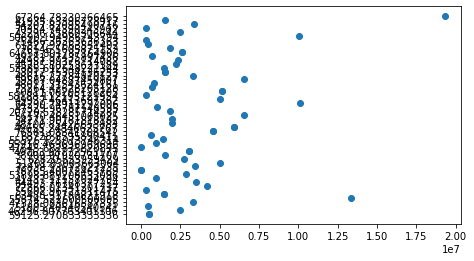

In [9]:
us_census.Women.fillna(0.0, inplace=True)
plt.scatter(us_census.Women, us_census.Income) 
plt.show()

In [10]:
us_census.duplicated()
us_census.drop_duplicates()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Men,Women
0,0,Rhode Island,1053661,13.356666666666678%,74.32541666666665%,5.68291666666667%,0.3462500000000001%,3.2474999999999983%,0.035833333333333335%,59125.270833333336,510388,543273.0
1,1,South Carolina,4777576,5.056684981684991%,62.888736263736185%,28.75091575091577%,0.2923992673992673%,1.249175824175822%,0.046978021978021964%,46296.807763401106,2322409,2455167.0
2,2,South Dakota,843190,3.2396396396396376%,82.50090090090092%,1.4238738738738752%,9.417567567567566%,1.0193693693693688%,0.04189189189189189%,51805.40540540541,423477,419713.0
3,3,Tennessee,6499615,4.720026972353339%,73.49008766014822%,18.283816587997297%,0.22663519892110592%,1.4072825354012126%,0.04315576534052599%,47328.083616587355,3167756,3331859.0
4,4,Texas,26538614,38.04673809068304%,44.687908934379145%,11.65004782858236%,0.26114405969007126%,3.6696958102161825%,0.06881576430074614%,55874.522600500095,13171316,13367298.0
5,5,Utah,2903379,13.468376068376063%,79.40683760683764%,1.0179487179487194%,1.0813675213675222%,2.196068376068376%,0.8259829059829059%,63488.91780821918,1459229,1444150.0
6,0,Utah,2903379,13.468376068376063%,79.40683760683764%,1.0179487179487194%,1.0813675213675222%,2.196068376068376%,0.8259829059829059%,63488.91780821918,1459229,1444150.0
7,1,Vermont,626604,1.6092896174863391%,93.98306010928961%,0.9808743169398909%,0.301639344262295%,1.2387978142076501%,0.03060109289617486%,55602.96721311475,308573,318031.0
8,2,Virginia,8256630,8.0110164981373%,63.271048430015945%,20.17599787120807%,0.21245343267695582%,5.455242150079845%,0.06471527408195847%,72866.01341201717,4060948,4195682.0
9,3,Washington,6985464,11.140968858131506%,72.03840830449816%,3.384429065743947%,1.4107266435986163%,7.022006920415224%,0.609896193771627%,64493.76768377254,3487725,3497739.0


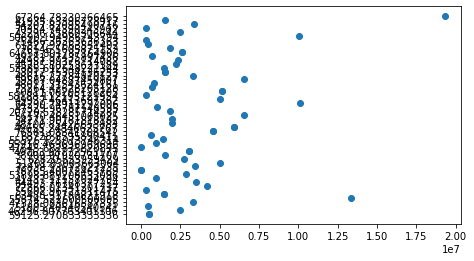

In [11]:
plt.scatter(us_census.Women, us_census.Income) 
plt.show()

### Histogram of Races

In [12]:
us_census['Hispanic'] = pd.to_numeric(us_census.Hispanic.replace({'%':''}, regex = True))
us_census['White'] = pd.to_numeric(us_census.White.replace({'%':''}, regex = True))
us_census['Black'] = pd.to_numeric(us_census.Black.replace({'%':''}, regex = True))
us_census['Native'] = pd.to_numeric(us_census.Native.replace({'%':''}, regex = True))
us_census['Asian'] = pd.to_numeric(us_census.Asian.replace({'%':''}, regex = True))
us_census['Pacific'] = pd.to_numeric(us_census.Pacific.replace({'%':''}, regex = True))
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Men,Women
0,0,Rhode Island,1053661,13.356667,74.325417,5.682917,0.346250,3.247500,0.035833,59125.270833333336,510388,543273.0
1,1,South Carolina,4777576,5.056685,62.888736,28.750916,0.292399,1.249176,0.046978,46296.807763401106,2322409,2455167.0
2,2,South Dakota,843190,3.239640,82.500901,1.423874,9.417568,1.019369,0.041892,51805.40540540541,423477,419713.0
3,3,Tennessee,6499615,4.720027,73.490088,18.283817,0.226635,1.407283,0.043156,47328.083616587355,3167756,3331859.0
4,4,Texas,26538614,38.046738,44.687909,11.650048,0.261144,3.669696,0.068816,55874.522600500095,13171316,13367298.0


In [14]:
us_census.Hispanic.fillna(0.0, inplace=True)
us_census.White.fillna(0.0, inplace=True)
us_census.Black.fillna(0.0, inplace=True)
us_census.Native.fillna(0.0, inplace=True)
us_census.Asian.fillna(0.0, inplace=True)
us_census.Pacific.fillna(0.0, inplace=True)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Men,Women
0,0,Rhode Island,1053661,13.356667,74.325417,5.682917,0.346250,3.247500,0.035833,59125.270833333336,510388,543273.0
1,1,South Carolina,4777576,5.056685,62.888736,28.750916,0.292399,1.249176,0.046978,46296.807763401106,2322409,2455167.0
2,2,South Dakota,843190,3.239640,82.500901,1.423874,9.417568,1.019369,0.041892,51805.40540540541,423477,419713.0
3,3,Tennessee,6499615,4.720027,73.490088,18.283817,0.226635,1.407283,0.043156,47328.083616587355,3167756,3331859.0
4,4,Texas,26538614,38.046738,44.687909,11.650048,0.261144,3.669696,0.068816,55874.522600500095,13171316,13367298.0
5,5,Utah,2903379,13.468376,79.406838,1.017949,1.081368,2.196068,0.825983,63488.91780821918,1459229,1444150.0
6,0,Utah,2903379,13.468376,79.406838,1.017949,1.081368,2.196068,0.825983,63488.91780821918,1459229,1444150.0
7,1,Vermont,626604,1.609290,93.983060,0.980874,0.301639,1.238798,0.030601,55602.96721311475,308573,318031.0
8,2,Virginia,8256630,8.011016,63.271048,20.175998,0.212453,5.455242,0.064715,72866.01341201717,4060948,4195682.0
9,3,Washington,6985464,11.140969,72.038408,3.384429,1.410727,7.022007,0.609896,64493.76768377254,3487725,3497739.0


In [15]:
us_census.duplicated()
us_census.drop_duplicates()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Men,Women
0,0,Rhode Island,1053661,13.356667,74.325417,5.682917,0.346250,3.247500,0.035833,59125.270833333336,510388,543273.0
1,1,South Carolina,4777576,5.056685,62.888736,28.750916,0.292399,1.249176,0.046978,46296.807763401106,2322409,2455167.0
2,2,South Dakota,843190,3.239640,82.500901,1.423874,9.417568,1.019369,0.041892,51805.40540540541,423477,419713.0
3,3,Tennessee,6499615,4.720027,73.490088,18.283817,0.226635,1.407283,0.043156,47328.083616587355,3167756,3331859.0
4,4,Texas,26538614,38.046738,44.687909,11.650048,0.261144,3.669696,0.068816,55874.522600500095,13171316,13367298.0
5,5,Utah,2903379,13.468376,79.406838,1.017949,1.081368,2.196068,0.825983,63488.91780821918,1459229,1444150.0
6,0,Utah,2903379,13.468376,79.406838,1.017949,1.081368,2.196068,0.825983,63488.91780821918,1459229,1444150.0
7,1,Vermont,626604,1.609290,93.983060,0.980874,0.301639,1.238798,0.030601,55602.96721311475,308573,318031.0
8,2,Virginia,8256630,8.011016,63.271048,20.175998,0.212453,5.455242,0.064715,72866.01341201717,4060948,4195682.0
9,3,Washington,6985464,11.140969,72.038408,3.384429,1.410727,7.022007,0.609896,64493.76768377254,3487725,3497739.0


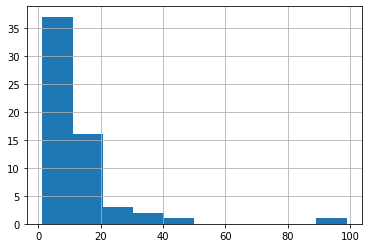

In [19]:
us_census.Hispanic.hist()

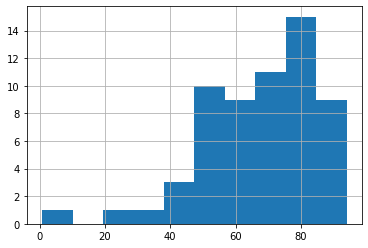

In [20]:
us_census.White.hist()


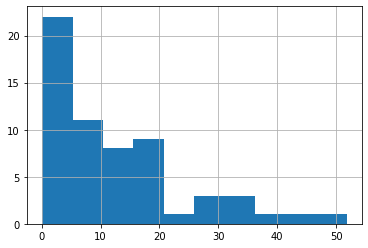

In [21]:
us_census.Black.hist()


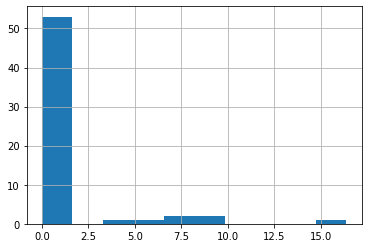

In [22]:
us_census.Native.hist()


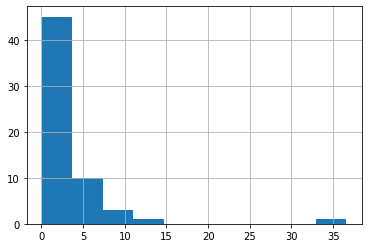

In [23]:
us_census.Asian.hist()


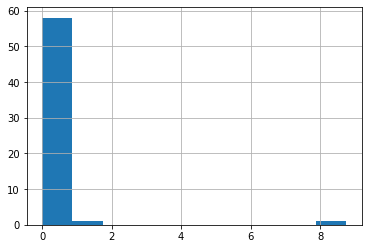

In [24]:
us_census.Pacific.hist()

## Part 2

In [120]:
#Loading Data
store_data = pd.read_csv('./data/inventory.csv')
store_data.head(10)

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [121]:
staten_island = store_data[:10]
staten_island

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [122]:
product_request = staten_island.product_description
product_request

0                         daisy
1                    calla lily
2                        tomato
3                          rake
4                   wheelbarrow
5                         spade
6                 insect killer
7                   weed killer
8    20 inch terracotta planter
9        8 inch plastic planter
Name: product_description, dtype: object

In [123]:
brooklyn = store_data[10:18]
brooklyn

,location,product_type,product_description,quantity,price
10,Brooklyn,seeds,daisy,50,6.99
11,Brooklyn,seeds,calla lily,0,19.99
12,Brooklyn,seeds,tomato,0,13.99
13,Brooklyn,garden tools,rake,15,13.99
14,Brooklyn,garden tools,wheelbarrow,82,89.99
15,Brooklyn,garden tools,spade,36,19.99
16,Brooklyn,pest_control,insect killer,80,12.99
17,Brooklyn,pest_control,weed killer,76,23.99


In [124]:
seed_request = brooklyn[brooklyn.product_type == 'seeds']
seed_request

,location,product_type,product_description,quantity,price
10,Brooklyn,seeds,daisy,50,6.99
11,Brooklyn,seeds,calla lily,0,19.99
12,Brooklyn,seeds,tomato,0,13.99


In [125]:
s1 = store_data.quantity > 0
s1 = s1.rename("in_stock")
s1

0      True
1      True
2      True
3      True
4     False
5      True
6      True
7      True
8     False
9      True
10     True
11    False
12    False
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26    False
27     True
28     True
Name: in_stock, dtype: bool

In [126]:
store_data = store_data.join(s1.to_frame(), how='left')
store_data.head()

,location,product_type,product_description,quantity,price,in_stock
0,Staten Island,seeds,daisy,4,6.99,True
1,Staten Island,seeds,calla lily,46,19.99,True
2,Staten Island,seeds,tomato,85,13.99,True
3,Staten Island,garden tools,rake,4,13.99,True
4,Staten Island,garden tools,wheelbarrow,0,89.99,False


In [127]:
s2 = store_data.quantity * store_data.price
s2 = s2.rename("total_value")
s2

0       27.96
1      919.54
2     1189.15
3       55.96
4        0.00
5     1859.07
6      961.26
7      191.92
8        0.00
9      211.47
10     349.50
11       0.00
12       0.00
13     209.85
14    7379.18
15     719.64
16    1039.20
17    1823.24
18      89.95
19     103.74
20     398.43
21    1899.05
22     629.55
23     293.79
24    8819.02
25     519.74
26       0.00
27     383.84
28    1565.13
Name: total_value, dtype: float64

In [128]:
store_data = store_data.join(s2.to_frame(), how='left')
store_data.head()

,location,product_type,product_description,quantity,price,in_stock,total_value
0,Staten Island,seeds,daisy,4,6.99,True,27.96
1,Staten Island,seeds,calla lily,46,19.99,True,919.54
2,Staten Island,seeds,tomato,85,13.99,True,1189.15
3,Staten Island,garden tools,rake,4,13.99,True,55.96
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00


In [129]:
combine_lambda = lambda row:
    '{} - {}'.format(row.product_type,
                     row.product_description)

s3 = store_data.assign(combine_lambda)
s3

SyntaxError: invalid syntax (<ipython-input-129-8d50e9ff80fc>, line 1)